### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [100]:
lista_alumnos = [("Caranchoa", 24, 1.82), 
                 ("Leo Messi", 25, 1.71), 
                 ("El bicho", 35, 1.66), 
                 ("Paquirrin", 37, 1.63), 
                 ("John Cobra", 29, 1.90), 
                 ("El tomate", 27, 1.80), 
                 ("El chucky de cieza", 28, 1.70), 
                 ("Chiquito de la Calzada", 32, 1.60), 
                 ("El cuñao", 36, 1.74), 
                 ("Rafa Nadal", 45, 1.72), 
                 ("Pau Gasol", 41, 1.65), 
                 ("El hermano de Pau Gasol", 30, 1.65), 
                 ("Joselito", 40, 1.60), 
                 ("Maria Isabel", 39, 1.80), 
                 ("Melody", 23, 1.77), 
                 ("Las ketchup", 32, 1.75), 
                 ("Pumuki", 27, 1.70), 
                 ("Naranjito", 34, 1.80), 
                 ("Espinete", 27, 1.77), 
                 ("El Feli", 28, 1.70), 
                 ("Jose Luis", 35, 1.80)]

In [101]:
import pandas as pd

In [102]:
df = pd.DataFrame(lista_alumnos)
df.rename(columns={0:"Nombre", 1:"Edad", 2:"Altura"}, inplace=True)
df

,Nombre,Edad,Altura
0,Caranchoa,24,1.82
1,Leo Messi,25,1.71
2,El bicho,35,1.66
3,Paquirrin,37,1.63
4,John Cobra,29,1.90
5,El tomate,27,1.80
6,El chucky de cieza,28,1.70
7,Chiquito de la Calzada,32,1.60
8,El cuñao,36,1.74
9,Rafa Nadal,45,1.72


In [103]:
# Muestra la info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


In [104]:
# Muestra los estadísticos del df
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


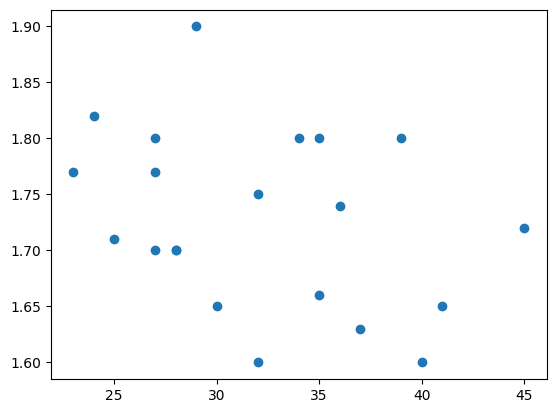

In [105]:
# Genera un scatter plot con Edad y Altura
import matplotlib.pyplot as plt
plt.scatter(x=df.loc[:,"Edad"], y=df.loc[:,"Altura"])

In [106]:
# Genera un heatmap
import seaborn as sns
sns.heatmap(df.corr(), annot=True);

ValueError: could not convert string to float: 'Caranchoa'

C:\Users\igbopa\AppData\Local\Temp\ipykernel_24836\2345240446.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Altura'])


<Axes: xlabel='Altura', ylabel='Density'>

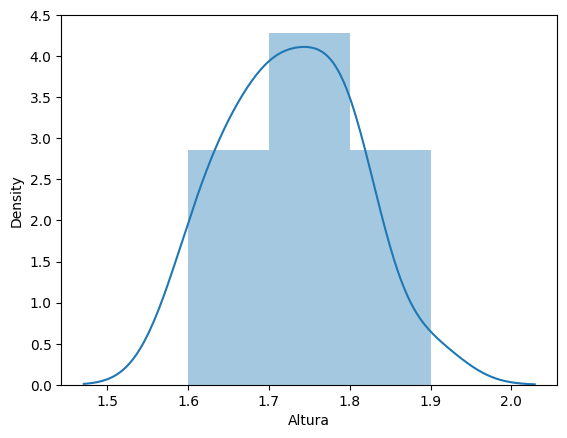

In [107]:
# Genera un distplot
sns.distplot(df['Altura'])

In [119]:
# Divide el df en features (X) y target (y)
X= df[["Edad"]]
X

,Edad
0,24
1,25
2,35
3,37
4,29
5,27
6,28
7,32
8,36
9,45


In [120]:
y= df[["Altura"]]
y

,Altura
0,1.82
1,1.71
2,1.66
3,1.63
4,1.90
5,1.80
6,1.70
7,1.60
8,1.74
9,1.72


In [121]:
from sklearn.model_selection import train_test_split

# Divide los datos en conjunto de entrenamiento y test
# Siendo el tamaño del conjunto test un 30% y la semilla sea 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [122]:
# Muestra el tamaño de X, X_train, y_train, X_test e y_test
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (21, 1)
Train features shape: (14, 1)
Train target shape: (14, 1)
Test features shape: (7, 1)
Test target shape: (7, 1)


In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
# Instancia y entrena un regresor lineal
lm = LinearRegression()
lm

LinearRegression()

In [125]:
lm.fit(X_train, y_train)

LinearRegression()

In [126]:
# imprime el intercepto y el coeficiente
print(lm.intercept_)

[1.85209063]


In [127]:
print(lm.coef_)

[[-0.00414006]]


In [128]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Edad,-0.00414


(Altura) = 1.85 - 0.0041*(Edad)

In [129]:
predictions = lm.predict(X_test)
predictions

array([[1.75272915],
       [1.71132853],
       [1.71960865],
       [1.74858908],
       [1.7030484 ],
       [1.74030896],
       [1.72788877]])

In [130]:
# Crea un df con el conjunto de test
# df_test
df_test = X_test.join(y_test)
df_test

,Edad,Altura
0,24,1.82
17,34,1.80
15,32,1.75
1,25,1.71
8,36,1.74
5,27,1.80
11,30,1.65


In [131]:
# Añade una columna con la predicción
df_test["Predicted_Height"] = predictions
df_test

,Edad,Altura,Predicted_Height
0,24,1.82,1.752729
17,34,1.80,1.711329
15,32,1.75,1.719609
1,25,1.71,1.748589
8,36,1.74,1.703048
5,27,1.80,1.740309
11,30,1.65,1.727889


In [132]:
# Añade una columna con la altura real
df_test["Real_Height"] = df["Altura"]
df_test

,Edad,Altura,Predicted_Height,Real_Height
0,24,1.82,1.752729,1.82
17,34,1.80,1.711329,1.80
15,32,1.75,1.719609,1.75
1,25,1.71,1.748589,1.71
8,36,1.74,1.703048,1.74
5,27,1.80,1.740309,1.80
11,30,1.65,1.727889,1.65


In [133]:
import seaborn as sns

In [ ]:
# Crea un plot con los datos reales y la predicción
sns.scatterplot(y_test, predictions)

In [138]:
# Muestra el score del módelo
lm.score(X_test, y_test)

-0.19742015635643928

In [140]:
df_test

,Edad,Altura,Predicted_Height,Real_Height
0,24,1.82,1.752729,1.82
17,34,1.80,1.711329,1.80
15,32,1.75,1.719609,1.75
1,25,1.71,1.748589,1.71
8,36,1.74,1.703048,1.74
5,27,1.80,1.740309,1.80
11,30,1.65,1.727889,1.65


In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn import metrics
import numpy as np


In [146]:
# Muestra el Mean Absolute Error, el Mean Squared Error y el Root Mean Squared Error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.05706488156539665
MSE: 0.0036851216240520687
RMSE: 0.060705202611078306


In [148]:
# Muestra el Mean Absolute Percentage Error
print('MAE:', metrics.mean_absolute_percentage_error(y_test, predictions))

MAE: 0.03253724207144201


In [150]:
# Muestra cual sería la predicción para 85 años de edad
old_man = np.array([[85]])

lm.predict(old_man)

c:\Users\igbopa\AppData\Local\miniconda3\envs\Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.50018538]])

In [ ]:
# Ahora vamos a calcular el MAE, MSE, RMSE y MAPE a mano


In [161]:
df_test['Error'] = abs(df_test['Real_Height'] - df_test['Predicted_Height'])
print(df_test)

    Edad  Altura  Predicted_Height  Real_Height  Absolute_Difference     Error
0     24    1.82          1.752729         1.82             0.067271  0.067271
17    34    1.80          1.711329         1.80             0.088671  0.088671
15    32    1.75          1.719609         1.75             0.030391  0.030391
1     25    1.71          1.748589         1.71             0.038589  0.038589
8     36    1.74          1.703048         1.74             0.036952  0.036952
5     27    1.80          1.740309         1.80             0.059691  0.059691
11    30    1.65          1.727889         1.65             0.077889  0.077889


In [26]:
# Añade una columna con el error

,Edad,predict_height,real_height,error
0,24,1.752729,1.82,0.067271
17,34,1.711329,1.80,0.088671
15,32,1.719609,1.75,0.030391
1,25,1.748589,1.71,0.038589
8,36,1.703048,1.74,0.036952
5,27,1.740309,1.80,0.059691
11,30,1.727889,1.65,0.077889


In [162]:
df_test['Absolute_Difference'] = abs(df_test['Real_Height'] - df_test['Predicted_Height'])


mae = df_test['Absolute_Difference'].mean()


print("El Error Absoluto Medio (MAE) es:", mae)

El Error Absoluto Medio (MAE) es: 0.05706488156539665


In [27]:
# Muestra el error medio

0.05706488156539665

In [164]:
df_test['Error_Cuadratico'] = (abs(df_test['Real_Height'] - df_test['Predicted_Height']))**2
df_test

,Edad,Altura,Predicted_Height,Real_Height,Absolute_Difference,Error,Error_Cuadratico
0,24,1.82,1.752729,1.82,0.067271,0.067271,0.004525
17,34,1.80,1.711329,1.80,0.088671,0.088671,0.007863
15,32,1.75,1.719609,1.75,0.030391,0.030391,0.000924
1,25,1.71,1.748589,1.71,0.038589,0.038589,0.001489
8,36,1.74,1.703048,1.74,0.036952,0.036952,0.001365
5,27,1.80,1.740309,1.80,0.059691,0.059691,0.003563
11,30,1.65,1.727889,1.65,0.077889,0.077889,0.006067


In [166]:
mse = df_test['Error_Cuadratico'].mean()


print("El Error Cuadratico Medio (MSE) es:", mse)

El Error Cuadratico Medio (MSE) es: 0.0036851216240520687


In [168]:
df_test['Raiz_Error_Cuadratico'] = np.square(abs(df_test['Real_Height'] - df_test['Predicted_Height']))**2
df_test

,Edad,Altura,Predicted_Height,Real_Height,Absolute_Difference,Error,Error_Cuadratico,Raiz_Error_Cuadratico
0,24,1.82,1.752729,1.82,0.067271,0.067271,0.004525,2.047895e-05
17,34,1.80,1.711329,1.80,0.088671,0.088671,0.007863,6.182095e-05
15,32,1.75,1.719609,1.75,0.030391,0.030391,0.000924,8.531000e-07
1,25,1.71,1.748589,1.71,0.038589,0.038589,0.001489,2.217471e-06
8,36,1.74,1.703048,1.74,0.036952,0.036952,0.001365,1.864373e-06
5,27,1.80,1.740309,1.80,0.059691,0.059691,0.003563,1.269511e-05
11,30,1.65,1.727889,1.65,0.077889,0.077889,0.006067,3.680438e-05


In [169]:
mrse = df_test['Raiz_Error_Cuadratico'].mean()


print("La Raiz del Error Cuadratico Medio (MRSE) es:", mrse)

La Raiz del Error Cuadratico Medio (MRSE) es: 1.9533477325934903e-05


In [30]:
# Muestra la raíz del error cuadrático medi

0.060705202611078306

In [31]:
# Muestra el error absoluto medio porcentual

0.032555352156298005